In [1]:
import os

In [2]:
os.chdir("C:\\Users\\SHAILESH TIWARI\\Python Files\\DataSources")

In [3]:
os.getcwd()

'C:\\Users\\SHAILESH TIWARI\\Python Files\\DataSources'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
dataset = pd.read_csv("airline_passengers.csv")

In [7]:
dataset

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<AxesSubplot:>

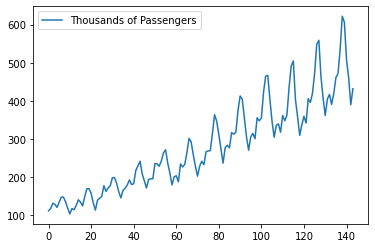

In [8]:
dataset.plot()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [15]:
dataset.set_index('Month', inplace= True)

In [16]:
dataset

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

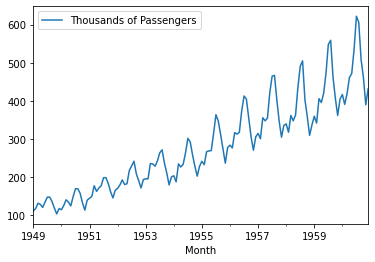

In [17]:
dataset.plot()

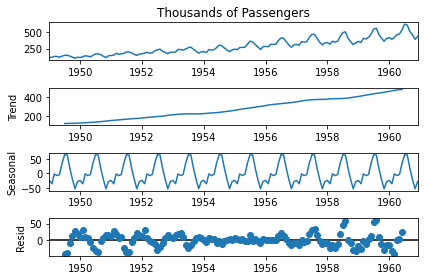

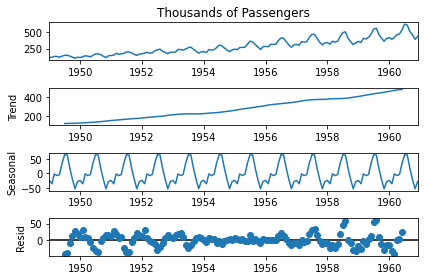

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], period=12) #yearly data
decomposition.plot() #for checking the components of the data

In [19]:
from statsmodels.tsa.stattools import adfuller  # to check the stationarity of the data

In [20]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [21]:
def adf_check(time_series):  #fi=unction for better visual results
    result = adfuller(time_series)
    print("AUGMENTED DICKEY FULLER TEST")
    labels = ['ADF Test Statistic','P-value','#Lags','No of obs']
    for value,label in zip(result,labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print("time series is stationary")
    else:
        print("time series is not stationary")

In [23]:
adf_check(dataset['Thousands of Passengers'])
#if P value >0.05 data be non stationary and we can use ARIMA 
#If P value < 0.05 data be stationary and we can use ARMA 

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:0.8153688792060456
P-value:0.991880243437641
#Lags:13
No of obs:130
time series is not stationary


In [24]:
dataset['Thousands of Passengers first diff']=dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1) # taking the difference of the data

In [25]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [26]:
adf_check(dataset['Thousands of Passengers first diff'].dropna())

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:-2.8292668241699817
P-value:0.05421329028382789
#Lags:12
No of obs:130
time series is not stationary


In [27]:
dataset['Thousands of Passengers second diff']=dataset['Thousands of Passengers first diff']-dataset['Thousands of Passengers first diff'].shift(1)

In [28]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [29]:
adf_check(dataset['Thousands of Passengers second diff'].dropna())

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:-16.384231542468523
P-value:2.7328918500141235e-29
#Lags:11
No of obs:130
time series is stationary


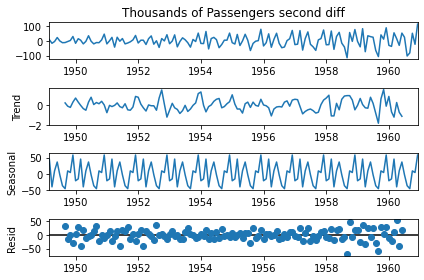

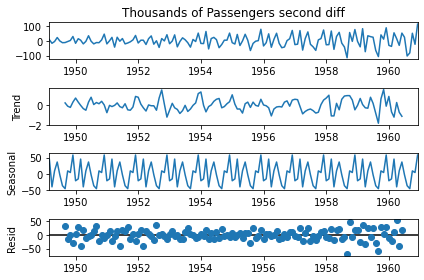

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers second diff'].dropna(), period=12) #yearly data
decomposition.plot()

In [32]:
#d=2 finding capital P as there is seasonality in data as well

In [33]:
dataset['Seasonal Diff'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(12)


In [34]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [35]:
#dataset.to_csv('file name.csv') # saving the dataset to the csv file

In [36]:
adf_check(dataset['Seasonal Diff'].dropna())

AUGMENTED DICKEY FULLER TEST
ADF Test Statistic:-3.3830207264924796
P-value:0.011551493085515008
#Lags:1
No of obs:130
time series is stationary


In [37]:
#D=1 for seasonality

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [39]:
#plot_pacf(dataset['Thousands of Passengers second diff'].dropna(), lags=14)


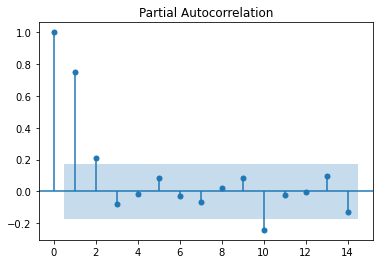

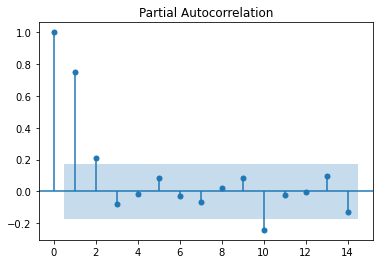

In [40]:
plot_pacf(dataset['Seasonal Diff'].dropna(),lags=14)
#P=1

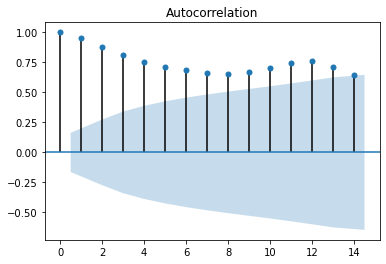

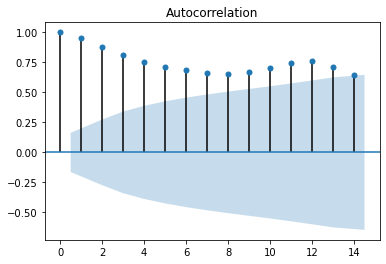

In [32]:
plot_acf(dataset['Thousands of Passengers'].dropna(),lags=14)
#p=1 

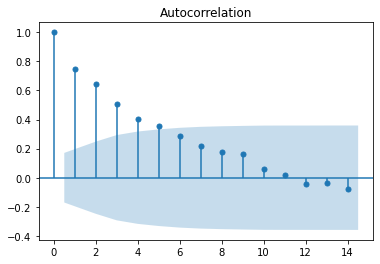

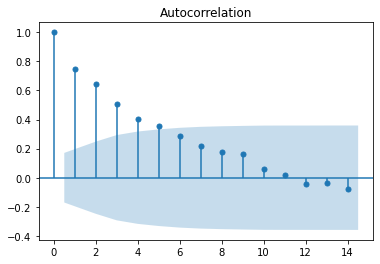

In [41]:
plot_acf(dataset['Seasonal Diff'].dropna(),lags=14)
#Q=2 seasons

In [42]:
# model application
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [43]:
model =sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order=(0,2,0),seasonal_order=(1,2,2,12))
results = model.fit()
print(results.summary())

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                 Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 2, [1, 2], 12)   Log Likelihood                -532.999
Date:                                 Sat, 19 Feb 2022   AIC                           1073.999
Time:                                         22:52:57   BIC                           1085.081
Sample:                                     01-01-1949   HQIC                          1078.499
                                          - 12-01-1960                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4764      0.587      0.811      0.417      -0.675       1

In [44]:
dataset['Forecast']= results.predict(start=130,end=144,dynamic = True)

In [45]:
len(dataset)

144

In [46]:
dataset

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,577.982113
1960-09-01,508,-98.0,-82.0,45.0,472.448788
1960-10-01,461,-47.0,51.0,54.0,407.608306


<AxesSubplot:xlabel='Month'>

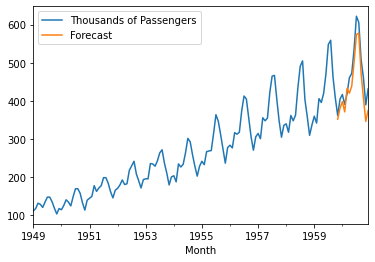

In [47]:
dataset[['Thousands of Passengers','Forecast']].plot()

In [48]:
from pandas.tseries.offsets import DateOffset #for future dates predictions adding dates here
future_dates= [dataset.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [49]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=dataset.columns)

In [50]:
future_dates_df

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [51]:
future_df=pd.concat([dataset,future_dates_df])

In [52]:
future_df

,Thousands of Passengers,Thousands of Passengers first diff,Thousands of Passengers second diff,Seasonal Diff,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN,NaN


In [53]:
#book: business analytics by dinesh kumar

C:\Users\SHAILESH TIWARI\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

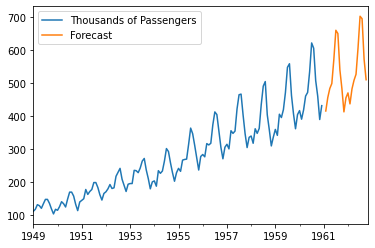

In [54]:
future_df['Forecast']=results.predict(start=145,end=165,dynamic=True)
future_df[['Thousands of Passengers','Forecast']].plot()

In [148]:
df = pd.read_csv("airline_passengers.csv")

In [149]:
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()

In [153]:
#df.iloc[:,[1]]

In [154]:
df.iloc[:,[1]] = scaler1.fit_transform(df.iloc[:,[1]])

In [161]:
df.head(2)

,Month,Thousands of Passengers,Output
0,1949-01,0.015444,0.015444
1,1949-02,0.027027,0.027027


In [160]:
df["Output"] = df['Thousands of Passengers']

In [162]:
lookback_span = 7
future_span = 0
test_data = 5

In [176]:
# Creating a data structure with 50 timesteps and 1 output
y = []
X = []

for i in range (lookback_span, len(df)):
    y.append(df.iloc[:,2][i])
    X.append(df.iloc[:,1][i-lookback_span:i])
    
len(X), len(y)

(137, 137)

In [177]:
train = int(len(df) -lookback_span-future_span)
test= test_data
train, test , train+test

(137, 5, 142)

In [178]:
X= np.array(X)
y = np.array(y)
X.shape, y.shape

((137, 7), (137,))

In [179]:
len(y)-future_span

137

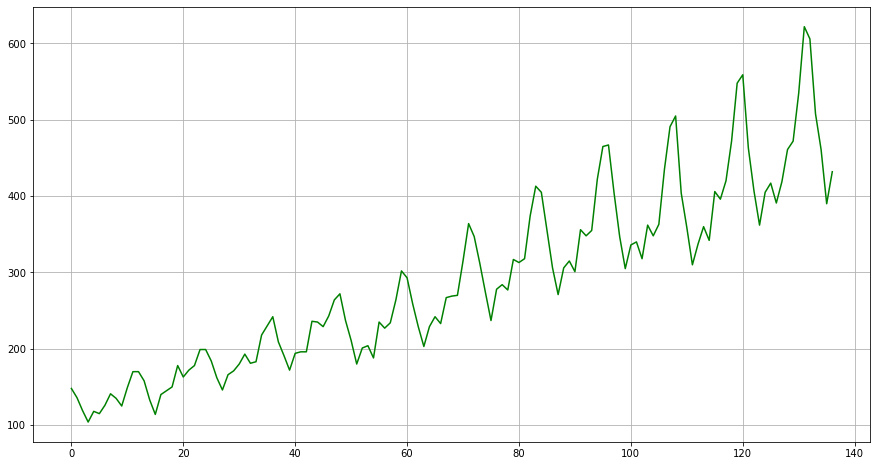

In [180]:
# Print the training Data Prediction on X_train  and y_train
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(scaler1.inverse_transform(y.reshape(-1,1)),color='green' )
#plt.plot(scaler1.inverse_transform(y.reshape(-1,1)),color='green', marker='o', linestyle='--',linewidth=.005, markersize=5 )
plt.show()

In [181]:
X_train =X[: len(X)-future_span]
X_test = X[len(X)-test_data:]
y_train = y[: len(y)-future_span]
y_test = y[len(y)- test_data:]

In [182]:
X_train = X_train.reshape(-1,lookback_span,1)
X_test = X_test.reshape(-1,lookback_span,1)
y_train = y_train.reshape (-1,1)
y_test =y_test.reshape(-1,1)

In [183]:
import tensorflow as tf
import keras
import time

In [184]:
from keras.models import Sequential 
from keras.layers import Input, LSTM, Dropout, Activation, Dense, Flatten
from keras.activations import linear, relu, tanh, sigmoid 
from keras.optimizers import adam_v2, rmsprop_v2, adadelta_v2, adagrad_v2
from keras.losses import mse, mean_absolute_error
from keras.metrics import accuracy

In [185]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM( 128, return_sequences=True, input_shape = X_train[0].shape))
#model.add(LSTM( input_dim=lookback_span*2, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
#model.add(Activaton('linear'))    #'linear'

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

model.summary()

compilation time :  0.0049970149993896484
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 7, 128)            66560     
                                                                 
 dropout_44 (Dropout)        (None, 7, 128)            0         
                                                                 
 lstm_45 (LSTM)              (None, 7, 32)             20608     
                                                                 
 dropout_45 (Dropout)        (None, 7, 32)             0         
                                                                 
 lstm_46 (LSTM)              (None, 7, 256)            295936    
                                                                 
 dropout_46 (Dropout)        (None, 7, 256)            0         
                                                                 
 lstm_47 (L

In [186]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train), type(X_test), type(y_train), type(y_test)

((137, 7, 1),
 (5, 7, 1),
 (137, 1),
 (5, 1),
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [192]:
model.compile(optimizer='rmsprop', loss='mse' , metrics=['accuracy'] )   #, metrics=['accuracy']

In [193]:
y_train

array([[0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374517],
       [0.17760618],
       [0.17760618],
       [0.25482625],
       [0.25289575],
       [0.24131274],
       [0.26833977],
       [0.308

In [211]:
history = model.fit(X_train, y_train, epochs=200,validation_data=[X_test, y_test] )  #validation_data=[X_test, y_test]

Epoch 1/200
5/5 [==============================] - 0s 74ms/step - loss: 0.0058 - accuracy: 0.0146 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 0s 67ms/step - loss: 0.0070 - accuracy: 0.0146 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 0s 67ms/step - loss: 0.0044 - accuracy: 0.0146 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 0s 67ms/step - loss: 0.0066 - accuracy: 0.0146 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 0s 67ms/step - loss: 0.0044 - accuracy: 0.0146 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 6/200
5/5 [==============================] - 0s 66ms/step - loss: 0.0072 - accuracy: 0.0146 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 7/200
5/5 [==============================] - 0s 66ms/step - loss: 0.0079 - accuracy: 0.0146 - val_loss: 0.0096 - val_accuracy: 0.0

5/5 [==============================] - 0s 73ms/step - loss: 0.0056 - accuracy: 0.0146 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 58/200
5/5 [==============================] - 0s 71ms/step - loss: 0.0068 - accuracy: 0.0146 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 59/200
5/5 [==============================] - 0s 72ms/step - loss: 0.0063 - accuracy: 0.0146 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 60/200
5/5 [==============================] - 0s 77ms/step - loss: 0.0052 - accuracy: 0.0146 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 61/200
5/5 [==============================] - 0s 72ms/step - loss: 0.0040 - accuracy: 0.0146 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 62/200
5/5 [==============================] - 0s 72ms/step - loss: 0.0053 - accuracy: 0.0146 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 63/200
5/5 [==============================] - 0s 71ms/step - loss: 0.0048 - accuracy: 0.0146 - val_loss: 0.0023 - val_accuracy: 0.0000e+0

5/5 [==============================] - 0s 70ms/step - loss: 0.0055 - accuracy: 0.0146 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 114/200
5/5 [==============================] - 0s 80ms/step - loss: 0.0041 - accuracy: 0.0146 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 115/200
5/5 [==============================] - 0s 70ms/step - loss: 0.0044 - accuracy: 0.0146 - val_loss: 0.0314 - val_accuracy: 0.0000e+00
Epoch 116/200
5/5 [==============================] - 0s 71ms/step - loss: 0.0066 - accuracy: 0.0146 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 117/200
5/5 [==============================] - 0s 70ms/step - loss: 0.0043 - accuracy: 0.0146 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 118/200
5/5 [==============================] - 0s 69ms/step - loss: 0.0052 - accuracy: 0.0146 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 119/200
5/5 [==============================] - 0s 70ms/step - loss: 0.0045 - accuracy: 0.0146 - val_loss: 0.0059 - val_accuracy: 0.0

5/5 [==============================] - 0s 75ms/step - loss: 0.0055 - accuracy: 0.0146 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 170/200
5/5 [==============================] - 0s 71ms/step - loss: 0.0045 - accuracy: 0.0146 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 171/200
5/5 [==============================] - 0s 65ms/step - loss: 0.0039 - accuracy: 0.0146 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 172/200
5/5 [==============================] - 0s 67ms/step - loss: 0.0040 - accuracy: 0.0146 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 173/200
5/5 [==============================] - 0s 65ms/step - loss: 0.0030 - accuracy: 0.0146 - val_loss: 9.6161e-04 - val_accuracy: 0.0000e+00
Epoch 174/200
5/5 [==============================] - 0s 69ms/step - loss: 0.0029 - accuracy: 0.0146 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 175/200
5/5 [==============================] - 0s 68ms/step - loss: 0.0033 - accuracy: 0.0146 - val_loss: 0.0015 - val_accuracy:

In [212]:
min (history.history['loss']),  min (history.history['val_loss'])

(0.0029195796232670546, 0.0008533118525519967)

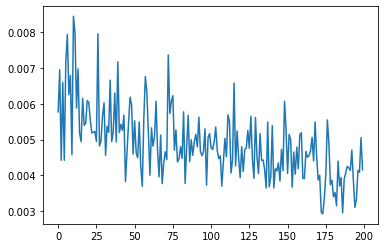

In [213]:
plt.plot (history.history['loss'])
#plt.plot (history.history['val_loss'])

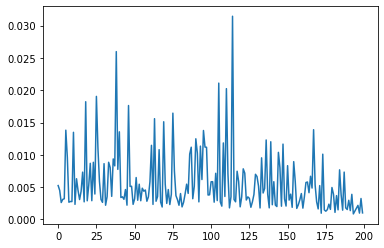

In [214]:
plt.plot (history.history['val_loss'])

In [215]:
scaler1.inverse_transform(model.predict (X_train))

array([[138.7114  ],
       [143.23656 ],
       [136.87888 ],
       [124.431175],
       [113.27893 ],
       [117.9187  ],
       [118.144325],
       [122.83777 ],
       [131.78886 ],
       [130.80714 ],
       [125.27904 ],
       [138.51917 ],
       [157.47662 ],
       [163.5942  ],
       [156.0467  ],
       [136.97171 ],
       [123.10304 ],
       [136.46295 ],
       [144.21585 ],
       [148.42409 ],
       [166.47856 ],
       [157.87234 ],
       [165.2796  ],
       [171.28235 ],
       [191.3953  ],
       [194.62843 ],
       [183.18356 ],
       [163.9235  ],
       [152.35345 ],
       [165.96695 ],
       [173.30678 ],
       [180.0917  ],
       [188.45724 ],
       [177.74007 ],
       [179.43488 ],
       [211.1486  ],
       [225.36159 ],
       [238.6047  ],
       [200.79062 ],
       [186.4076  ],
       [175.50958 ],
       [197.88159 ],
       [202.97809 ],
       [202.18683 ],
       [233.96613 ],
       [228.68974 ],
       [223.93936 ],
       [237.4

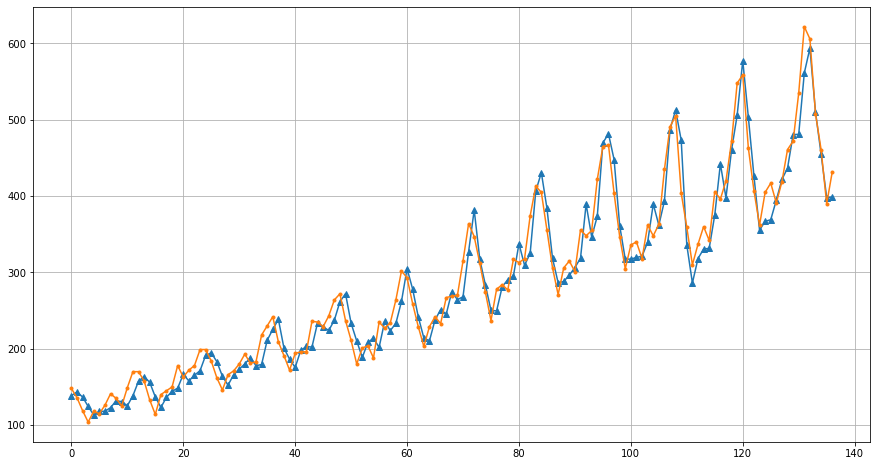

In [216]:
# Print the training Data Prediction on X_train  and y_train
plt.figure(figsize=(15,8))
plt.grid()
plt.plot([i for i in range (len(y_train))] , scaler1.inverse_transform(model.predict (X_train) ), marker="^")
plt.plot([i for i in range (len(y_train))], scaler1.inverse_transform(y_train),marker="."  )
#plt.plot(y_test)
plt.show()

In [218]:
#pred = model.predict(X_test)
#scaler.inverse_transform(pred)